# QuatIca Core Functionality Demo

This notebook demonstrates all the core functionality examples from the README.
Run each cell to see the code in action!

## Setup and Imports

In [1]:
import sys
import os
import numpy as np
import quaternion
import matplotlib.pyplot as plt

In [2]:
# Add the core module to the path
sys.path.append('core')

In [3]:
print("✅ All imports successful!")

✅ All imports successful!


## 1. Basic Matrix Operations

In [4]:
from core.utils import quat_matmat, quat_frobenius_norm
from core.data_gen import create_test_matrix

In [5]:
# Create test matrices
A = create_test_matrix(3, 4)
B = create_test_matrix(4, 2)

In [6]:
print("Matrix A shape:", A.shape)
print("Matrix B shape:", B.shape)
print("Matrix A norm:", quat_frobenius_norm(A))
print("Matrix B norm:", quat_frobenius_norm(B))

Matrix A shape: (3, 4)
Matrix B shape: (4, 2)
Matrix A norm: 20.405674865864274
Matrix B norm: 12.589121718375907


In [7]:
# Matrix multiplication
C = quat_matmat(A, B)
print("Matrix C = A @ B shape:", C.shape)
print("Matrix C norm:", quat_frobenius_norm(C))

Matrix C = A @ B shape: (3, 2)
Matrix C norm: 125.3763422417531


In [8]:
print("✅ Basic matrix operations work!")

✅ Basic matrix operations work!


## 2. QR Decomposition

In [9]:
from core.decomp.qsvd import qr_qua

In [10]:
# Create a test matrix
X_quat = create_test_matrix(4, 3)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (4, 3)


In [12]:
# QR decomposition
Q, R = qr_qua(X_quat)
print("Q shape:", Q.shape)
print("R shape:", R.shape)

Q shape: (4, 3)
R shape: (3, 3)


In [13]:
# Verify reconstruction
X_recon = quat_matmat(Q, R)
reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
print("Reconstruction error:", reconstruction_error)

Reconstruction error: 9.538230920089008e-15


In [16]:
from core.utils import quat_matmat, quat_hermitian, quat_frobenius_norm

quat_matmat(quat_hermitian(Q), Q)

array([[quaternion(1, 0, 0, -6.93889390390723e-18),
        quaternion(0, -2.08166817117217e-16, -5.55111512312578e-17, 0),
        quaternion(0, 9.71445146547012e-17, 8.67361737988404e-18, -1.2490009027033e-16)],
       [quaternion(0, 2.08166817117217e-16, 4.85722573273506e-17, 6.93889390390723e-18),
        quaternion(1, 0, 0, 0),
        quaternion(-6.93889390390723e-17, 1.38777878078145e-17, -7.63278329429795e-17, -2.22044604925031e-16)],
       [quaternion(0, -9.0205620750794e-17, -6.93889390390723e-18, 8.32667268468867e-17),
        quaternion(-9.0205620750794e-17, -2.77555756156289e-17, 5.55111512312578e-17, 2.22044604925031e-16),
        quaternion(1, 0, -2.77555756156289e-17, 0)]], dtype=quaternion)

In [17]:
print("✅ QR decomposition works!")

✅ QR decomposition works!


## 3. Quaternion SVD (Q-SVD)

In [18]:
from core.decomp.qsvd import classical_qsvd, classical_qsvd_full

In [19]:
# Create a test matrix
X_quat = create_test_matrix(5, 4)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (5, 4)


In [20]:
# Truncated Q-SVD
R = 2  # Target rank
U, s, V = classical_qsvd(X_quat, R)
print("Truncated Q-SVD:")
print("  U shape:", U.shape)
print("  s length:", len(s))
print("  V shape:", V.shape)

Truncated Q-SVD:
  U shape: (5, 2)
  s length: 2
  V shape: (4, 2)


In [21]:
# Full Q-SVD
U_full, s_full, V_full = classical_qsvd_full(X_quat)
print("\nFull Q-SVD:")
print("  U_full shape:", U_full.shape)
print("  s_full length:", len(s_full))
print("  V_full shape:", V_full.shape)


Full Q-SVD:
  U_full shape: (5, 5)
  s_full length: 4
  V_full shape: (4, 4)


In [22]:
print("✅ Q-SVD works!")

✅ Q-SVD works!


## 4. Eigenvalue Decomposition

In [23]:
from core.decomp import quaternion_eigendecomposition, quaternion_eigenvalues, quaternion_eigenvectors
from core.utils import quat_hermitian

In [24]:
# Create a Hermitian matrix A = B^H @ B
B = create_test_matrix(4, 3)
B_H = quat_hermitian(B)
A_quat = quat_matmat(B_H, B)
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [25]:
# Full eigendecomposition
eigenvalues, eigenvectors = quaternion_eigendecomposition(A_quat)
print("Full eigendecomposition:")
print("  Number of eigenvalues:", len(eigenvalues))
print("  Eigenvectors shape:", eigenvectors.shape)

Full eigendecomposition:
  Number of eigenvalues: 3
  Eigenvectors shape: (3, 3)


In [26]:
# Extract only eigenvalues
eigenvals = quaternion_eigenvalues(A_quat)
print("\nEigenvalues only:", len(eigenvals))


Eigenvalues only: 3


In [27]:
# Extract only eigenvectors
eigenvecs = quaternion_eigenvectors(A_quat)
print("Eigenvectors only shape:", eigenvecs.shape)

Eigenvectors only shape: (3, 3)


In [28]:
# Verify eigenvalues are real
imaginary_parts = np.imag(eigenvalues)
max_imag = np.max(np.abs(imaginary_parts))
print("Maximum imaginary part:", max_imag)

Maximum imaginary part: 3.557888645052136e-34


In [29]:
print("✅ Eigenvalue decomposition works!")

✅ Eigenvalue decomposition works!


## 5. Tridiagonalization

In [30]:
from core.decomp import tridiagonalize

In [31]:
# Use the same Hermitian matrix from above
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [32]:
# Tridiagonalize
P, B_tridiag = tridiagonalize(A_quat)
print("Tridiagonalization:")
print("  P shape:", P.shape)
print("  B shape:", B_tridiag.shape)

Tridiagonalization:
  P shape: (3, 3)
  B shape: (3, 3)


In [33]:
# Verify transformation
P_H = quat_hermitian(P)
PAP_H = quat_matmat(quat_matmat(P, A_quat), P_H)
transformation_error = quat_frobenius_norm(PAP_H - B_tridiag)
print("  Transformation error:", transformation_error)

  Transformation error: 5.3643881054907825e-14


In [34]:
print("✅ Tridiagonalization works!")

✅ Tridiagonalization works!


## 6. Pseudoinverse Computation

In [35]:
from core.solver import NewtonSchulzPseudoinverse

In [36]:
# Create a test matrix
A = create_test_matrix(3, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (3, 4)


In [37]:
# Compute pseudoinverse
solver = NewtonSchulzPseudoinverse()
A_pinv, residuals, covariances = solver.compute(A)
print("Pseudoinverse A^† shape:", A_pinv.shape)

Pseudoinverse A^† shape: (4, 3)


In [38]:
# Verify pseudoinverse properties
A_pinv_H = quat_hermitian(A_pinv)
print("A^† shape:", A_pinv.shape)
print("A^†^† shape:", A_pinv_H.shape)

A^† shape: (4, 3)
A^†^† shape: (3, 4)


In [39]:
print("✅ Pseudoinverse computation works!")

✅ Pseudoinverse computation works!


## 7. Linear System Solving

In [40]:
from core.solver import QGMRESSolver

In [41]:
# Create a square system A * x = b
A = create_test_matrix(3, 3)
b = create_test_matrix(3, 1)
print("System A shape:", A.shape)
print("Right-hand side b shape:", b.shape)

System A shape: (3, 3)
Right-hand side b shape: (3, 1)


In [42]:
# Solve using Q-GMRES
solver = QGMRESSolver()
x, info = solver.solve(A, b)
print("Solution x shape:", x.shape)
print("Convergence info:", info)

Solution x shape: (3, 1)
Convergence info: {'iterations': 3, 'residual': np.float64(5.6514997378283015e-16), 'residual_history': [[1, np.float64(0.729405989394959), np.float64(0.7294059893949592)], [2, np.float64(0.7854042857018608), np.float64(0.572878590087407)], [3, np.float64(1.1006361156632908e-15), np.float64(5.6514997378283015e-16)]], 'converged': np.True_, 'V0': array([[ 0.02251871,  0.02095226,  0.35624279],
       [ 0.32667758, -0.14735547, -0.24440492],
       [ 0.38181466,  0.38069612,  0.37524988]]), 'V1': array([[-0.03458039, -0.04445636, -0.1113707 ],
       [ 0.52498142, -0.40233179, -0.17471149],
       [ 0.25366305,  0.5250937 ,  0.02332163]]), 'V2': array([[-0.08224192,  0.26186436, -0.62538815],
       [ 0.50268451, -0.0265337 , -0.16387038],
       [ 0.32290287,  0.05961109,  0.10928821]]), 'V3': array([[ 0.02137593, -0.50483843,  0.36715609],
       [ 0.17202331, -0.11574214, -0.14351439],
       [ 0.10988783,  0.22860153,  0.20920245]])}


In [43]:
# Verify solution
Ax = quat_matmat(A, x)
residual = quat_frobenius_norm(Ax - b)
print("Residual ||A*x - b||:", residual)

Residual ||A*x - b||: 1.620554865521817e-15


In [44]:
print("✅ Linear system solving works!")

✅ Linear system solving works!


## 8. Visualization

In [45]:
from core.visualization import Visualizer

In [46]:
# Create a test matrix
A = create_test_matrix(4, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (4, 4)


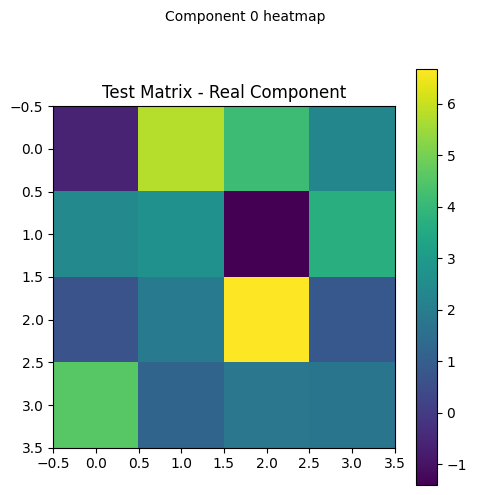

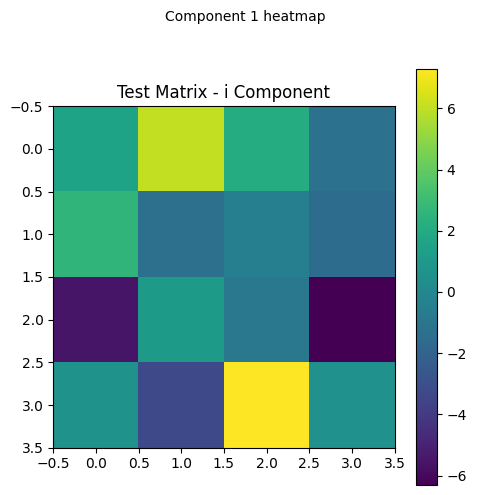

In [47]:
# Plot matrix components
Visualizer.visualize_matrix(A, component=0, title="Test Matrix - Real Component")
Visualizer.visualize_matrix(A, component=1, title="Test Matrix - i Component")

In [ ]:
print("✅ Visualization works!")

## Summary

In [ ]:
print("🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!")
print("\n✅ Basic matrix operations")
print("✅ QR decomposition")
print("✅ Quaternion SVD (Q-SVD)")
print("✅ Eigenvalue decomposition")
print("✅ Tridiagonalization")
print("✅ Pseudoinverse computation")
print("✅ Linear system solving")
print("✅ Visualization")
print("\nThe code examples in the README are working correctly! 🚀") 